<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

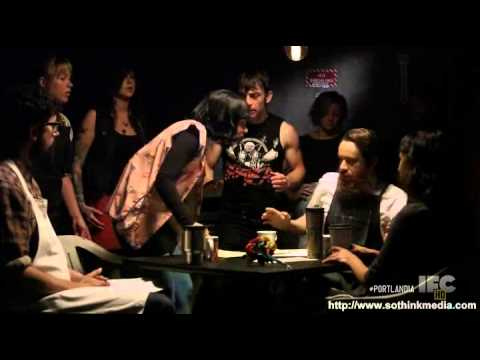

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\Users\\Ashley\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [4]:
shops.shape

(7616, 3)

In [5]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

In [6]:
#splitting the date from the review column
#This will put date into a new column
dates = []
for text in shops['full_review_text']:
    dates.append(re.findall(r'\b[0-3]?[0-9]/[0-3]?[0-9]/(?:[0-9]{2})?[0-9]{2}\b', text)[0])
shops['review_date'] = dates

#remove date from the full_review_text column
#remove other random text that isn't needed
shops['full_review_text'] = shops['full_review_text'].str.replace('\d', '')
shops['full_review_text'] = shops['full_review_text'].str.replace('//', '')
shops['full_review_text'] = shops['full_review_text'].str.replace('check-ins', '')
shops['full_review_text'] = shops['full_review_text'].str.replace('check-in', '')

#removing the text in star_rating
shops['star_rating'] = shops['star_rating'].map(lambda x: x.rstrip(' star rating'))

In [7]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_date
0,The Factory - Cafe With a Soul,Love love loved the atmosphere! Every corn...,5.0,11/25/2016
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Au...",4.0,12/2/2016
2,The Factory - Cafe With a Soul,Listed in Brunch Spots I loved the eclecti...,4.0,11/30/2016
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating H...,2.0,11/25/2016
4,The Factory - Cafe With a Soul,They are located within the Northcross mal...,4.0,12/3/2016


In [8]:
#Remove the punctuation

shops['full_review_text'] = shops['full_review_text'].str.replace(r'[^\w\s]+', '')
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_date
0,The Factory - Cafe With a Soul,Love love loved the atmosphere Every corne...,5.0,11/25/2016
1,The Factory - Cafe With a Soul,Listed in Date Night Austin Ambiance in Aust...,4.0,12/2/2016
2,The Factory - Cafe With a Soul,Listed in Brunch Spots I loved the eclecti...,4.0,11/30/2016
3,The Factory - Cafe With a Soul,Very cool decor Good drinks Nice seating Ho...,2.0,11/25/2016
4,The Factory - Cafe With a Soul,They are located within the Northcross mal...,4.0,12/3/2016


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [9]:
#time to tokenize

def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [10]:
shops['tokens'] = shops['full_review_text'].apply(tokenize)

In [11]:
shops[['full_review_text', 'tokens']].sample(20)

#tokens are showing as words here

,full_review_text,tokens
3230,Listed in Lets Taco Bout It Serious Burger...,"[listed, in, lets, taco, bout, it, serious, bu..."
3276,Great service and strong coffee What more ...,"[great, service, and, strong, coffee, what, mo..."
3639,Free wifi good food friendly crowd lots of...,"[free, wifi, good, food, friendly, crowd, lots..."
4959,The service was okay not as friendly as ot...,"[the, service, was, okay, not, as, friendly, a..."
6919,This is the cutest place in Austin for a cof...,"[this, is, the, cutest, place, in, austin, for..."
2230,Simply the very best cappuccino in Austin Th...,"[simply, the, very, best, cappuccino, in, aust..."
2118,I understand that Houndstooth wants to make ...,"[i, understand, that, houndstooth, wants, to, ..."
6166,Im a big fan of Stinsons Im here pretty much...,"[im, a, big, fan, of, stinsons, im, here, pret..."
1404,Great atmosphere fantastic coffee Taco deli ...,"[great, atmosphere, fantastic, coffee, taco, d..."
7153,stars hands down everything here is homem...,"[stars, hands, down, everything, here, is, hom..."


In [12]:
#hops['full_review_text'].value_counts()[:10]

In [13]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
shops['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('the', 34809),
 ('and', 26651),
 ('a', 22756),
 ('i', 20249),
 ('to', 17164),
 ('of', 12600),
 ('is', 11999),
 ('coffee', 10354),
 ('was', 9707),
 ('in', 9546)]

In [14]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [15]:
# Use the Function
wc = count(shops['tokens'])

In [16]:
#We'll need to use stop words to remove what is showing below
#let's do that after making some plots of what we currently have
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
55,the,6847,34809,1.0,0.045590,0.045590,0.899028
12,and,6864,26651,2.0,0.034905,0.080494,0.901261
7,a,6246,22756,3.0,0.029804,0.110298,0.820116
58,i,5532,20249,4.0,0.026520,0.136818,0.726366
36,to,5653,17164,5.0,0.022480,0.159298,0.742253


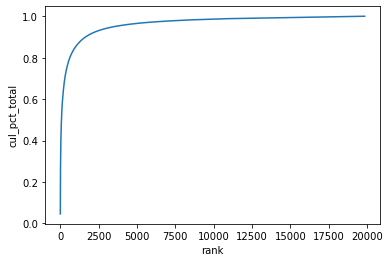

In [17]:
import seaborn as sns

# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [18]:
wc[wc['rank'] <= 100]['cul_pct_total'].max()

0.5436753713994589

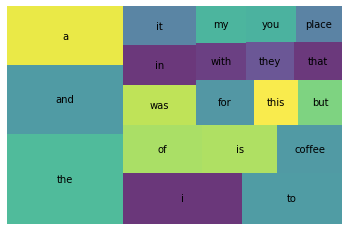

In [19]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [20]:
#Stop word time
#Spacy's Default Stop Words

nlp.Defaults.stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [21]:
#Going to tokenize after default stop word removal
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [22]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [23]:
shops['tokens'].head()

0    [    , love, love, loved, atmosphere, corner, ...
1    [  , listed, date, night, austin, ambiance, au...
2    [    , listed, brunch, spots, loved, eclectic,...
3    [  , cool, decor, good, drinks, nice, seating,...
4    [    , located, northcross, mall, shopping, ce...
Name: tokens, dtype: object

In [24]:
wc = count(shops['tokens'])

In [25]:
wc.head()

#maybe we need to extend the stop words?

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
6,,5390,21883,1.0,0.056252,0.056252,0.707721
0,coffee,4877,10354,2.0,0.026616,0.082868,0.640362
44,,5013,5747,3.0,0.014773,0.097641,0.658220
85,place,3659,5426,4.0,0.013948,0.111589,0.480436
157,good,2788,3973,5.0,0.010213,0.121802,0.366071


In [26]:
STOP_WORDS = nlp.Defaults.stop_words.union([' ','I', 'i', 'it', "it's", 'it.', 'the', 'this',])

In [27]:
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops['full_review_text'] = tokens

In [28]:
wc = count(shops['tokens'])
wc.head()

#I'm not sure what I'm missing here to still get the same words

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
6,,5390,21883,1.0,0.056252,0.056252,0.707721
0,coffee,4877,10354,2.0,0.026616,0.082868,0.640362
44,,5013,5747,3.0,0.014773,0.097641,0.658220
85,place,3659,5426,4.0,0.013948,0.111589,0.480436
157,good,2788,3973,5.0,0.010213,0.121802,0.366071


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [32]:
#Let's look at our value counts to get a feel for the ratings

shops['star_rating'].value_counts()

 5.0    3780
 4.0    2360
 3.0     738
 2.0     460
 1.0     278
Name: star_rating, dtype: int64

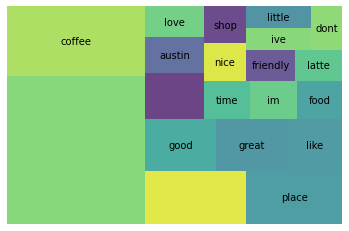

In [29]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [30]:
wc.head(10)

#WHY THE SPACES??? :( 

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
6,,5390,21883,1.0,0.056252,0.056252,0.707721
0,coffee,4877,10354,2.0,0.026616,0.082868,0.640362
44,,5013,5747,3.0,0.014773,0.097641,0.658220
85,place,3659,5426,4.0,0.013948,0.111589,0.480436
157,good,2788,3973,5.0,0.010213,0.121802,0.366071
126,great,2836,3919,6.0,0.010074,0.131876,0.372374
163,like,2124,3088,7.0,0.007938,0.139814,0.278887
25,,2889,2901,8.0,0.007457,0.147271,0.379333
55,austin,1788,2252,9.0,0.005789,0.153060,0.234769
9,love,1500,1935,10.0,0.004974,0.158034,0.196954


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

